In [1]:
import sys
from qiskit.converters import circuit_to_dag, dag_to_circuit
import supremacy_generator as suprem_gen
import auto_cut_finder as cut_finder
import old_cutter as old_cutter
import cutter as new_cutter
from qiskit.tools.visualization import dag_drawer
import networkx as nx
import copy
from qiskit.circuit.quantumregister import QuantumRegister

while(1):
    circ = suprem_gen.circuit_generator(circuit_dimension=(4,4,8), random_order=True)
    pareto_K_d = cut_finder.find_pareto_solutions(circ, num_clusters=2)
    bug_circ = None
    bug_cuts = None
    for pareto_key in pareto_K_d:
        try:
            sub_circs_no_bridge, complete_path_map, K, d = old_cutter.cut_circuit(circ, pareto_K_d[pareto_key])
        except:
            bug_circ = circ
            bug_cuts = pareto_K_d[pareto_key]
            print(bug_cuts)
            print('BUG')
            sys.exit(0)
#         print(pareto_key, pareto_K_d[pareto_key])
#         print(K, d)

will run 877 times
will run 877 times
[((QuantumRegister(16, 'q'), 6), 4), ((QuantumRegister(16, 'q'), 9), 4), ((QuantumRegister(16, 'q'), 7), 3), ((QuantumRegister(16, 'q'), 8), 3), ((QuantumRegister(16, 'q'), 9), 1)]
BUG


SystemExit: 0

/Users/weitang/Documents/Princeton/circuit_cutting/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3333: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


component 0
registers: {'q': QuantumRegister(10, 'q'), 'cutQ': QuantumRegister(1, 'cutQ')}
****************************************************************************************************
component 1
registers: {'q': QuantumRegister(6, 'q'), 'cutQ': QuantumRegister(4, 'cutQ')}
****************************************************************************************************


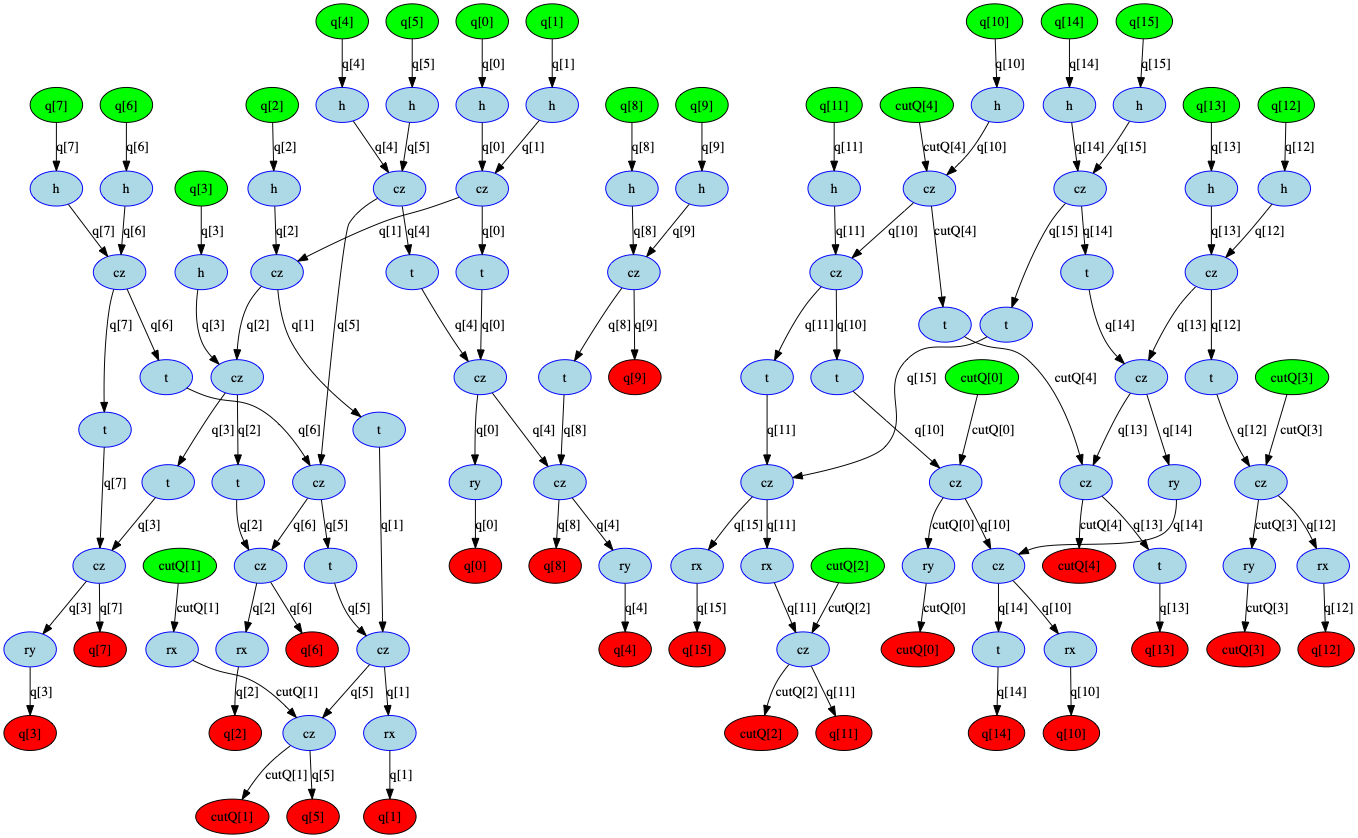

In [2]:
original_dag = circuit_to_dag(bug_circ)
positions = bug_cuts
cut_dag, complete_path_map = new_cutter.cut_edges(original_dag=original_dag, positions=positions)
new_cutter.fragments_generator(cut_dag)
# [print(x,complete_path_map[x]) for x in complete_path_map]
dag_to_circuit(cut_dag).draw(line_length=400)
dag_drawer(cut_dag)

[((QuantumRegister(16, 'q'), 5), 4), ((QuantumRegister(16, 'q'), 10), 4), ((QuantumRegister(16, 'q'), 4), 3), ((QuantumRegister(16, 'q'), 11), 3), ((QuantumRegister(16, 'q'), 10), 2)]


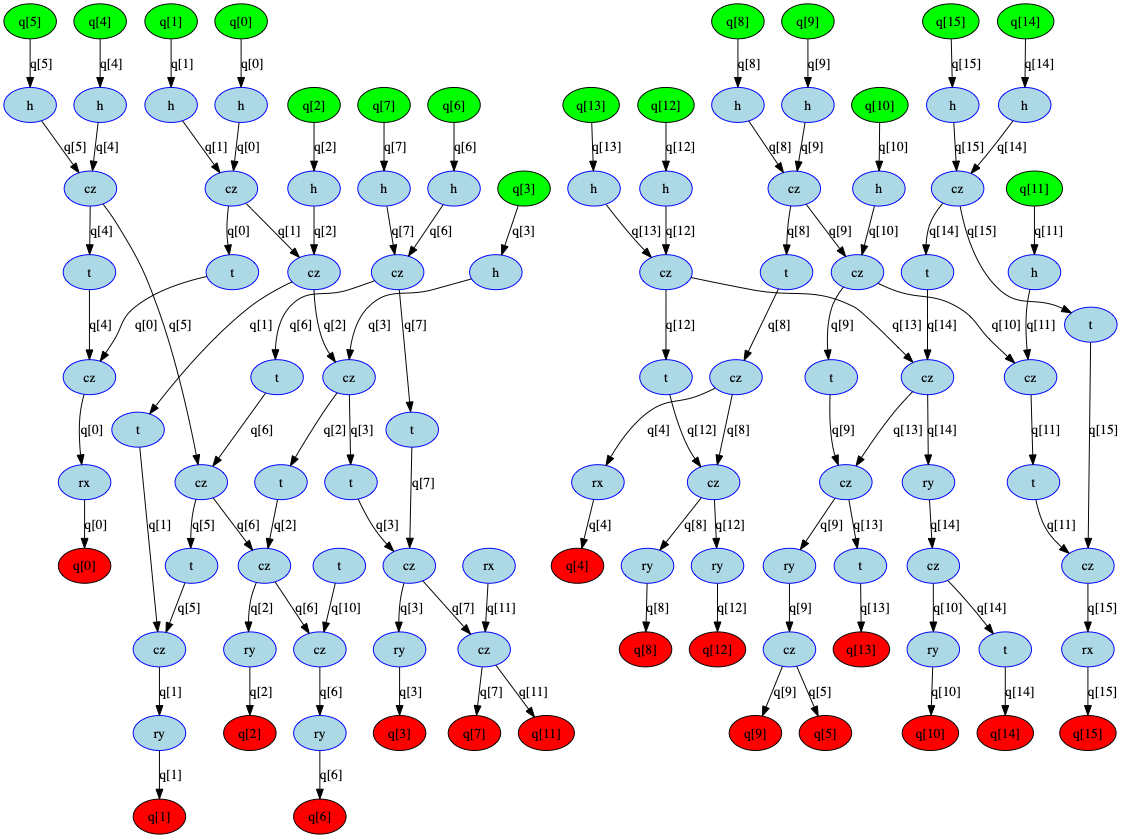

In [3]:
original_dag = circuit_to_dag(bug_circ)
positions = bug_cuts
print(positions)
cut_dag, _ = old_cutter.cut_edges(original_dag=original_dag, positions=positions)
dag_drawer(cut_dag)